In [1]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model

In [12]:
alu_production = pd.read_csv("../data/aluminuim_production.csv")

In [13]:
alu_production = alu_production[["Date", "Africa", "North America", "South America", "Asia (ex China)", "Western & Central Europe", "Russia & Eastern Europe", "Oceania", "Gulf Cooperation Council", "China (Estimated)", "Estimated Unreported to IAI"]]
alu_production["Total"] = alu_production.sum(axis="columns", numeric_only=True)
alu_production["Date"] = pd.to_datetime(alu_production["Date"], format="%d/%m/%Y")
alu_production.rename(columns={"Total":"Production_total"}, inplace=True)

In [14]:
alu_production

,Date,Africa,North America,South America,Asia (ex China),Western & Central Europe,Russia & Eastern Europe,Oceania,Gulf Cooperation Council,China (Estimated),Estimated Unreported to IAI,Production_total
0,1973-01-01,20,419,19,120,220,NaN,27,NaN,NaN,165,990.0
1,1973-02-01,18,391,17,110,204,NaN,24,NaN,NaN,165,929.0
2,1973-03-01,18,434,17,123,230,NaN,26,NaN,NaN,165,1013.0
3,1973-04-01,18,415,19,119,223,NaN,27,NaN,NaN,165,986.0
4,1973-05-01,20,428,19,123,235,NaN,28,NaN,NaN,165,1018.0
...,...,...,...,...,...,...,...,...,...,...,...,...
593,2022-06-01,135,312,103,372,243,338.0,148,498.0,3348.0,154,5651.0
594,2022-07-01,138,306,111,382,251,350.0,153,519.0,3519.0,160,5889.0
595,2022-08-01,140,305,116,391,250,350.0,154,514.0,3521.0,160,5901.0
596,2022-09-01,135,301,115,380,237,332.0,151,501.0,3363.0,154,5669.0


In [15]:
alu_production.dropna(inplace=True)

In [16]:
alu_production.corr("pearson")

C:\Users\rnoeske\AppData\Local\Temp\ipykernel_13980\1832175636.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  alu_production.corr("pearson")


,Africa,North America,South America,Asia (ex China),Western & Central Europe,Russia & Eastern Europe,Oceania,Gulf Cooperation Council,China (Estimated),Estimated Unreported to IAI,Production_total
Africa,1.000000,0.658692,0.566627,-0.527790,0.611693,0.155803,0.621683,-0.462356,-0.482293,-0.444101,-0.445214
North America,0.658692,1.000000,0.843281,-0.886167,0.545862,0.256686,0.845287,-0.790615,-0.831524,-0.764105,-0.812725
South America,0.566627,0.843281,1.000000,-0.804687,0.502631,0.374946,0.857244,-0.929804,-0.912415,-0.919642,-0.901353
Asia (ex China),-0.527790,-0.886167,-0.804687,1.000000,-0.496393,0.080578,-0.715890,0.838057,0.883034,0.700208,0.894655
Western & Central Europe,0.611693,0.545862,0.502631,-0.496393,1.000000,0.200836,0.598557,-0.523583,-0.546376,-0.482232,-0.508009
Russia & Eastern Europe,0.155803,0.256686,0.374946,0.080578,0.200836,1.000000,0.506753,-0.216230,-0.222433,-0.458635,-0.161468
Oceania,0.621683,0.845287,0.857244,-0.715890,0.598557,0.506753,1.000000,-0.797393,-0.849808,-0.831936,-0.812866
Gulf Cooperation Council,-0.462356,-0.790615,-0.929804,0.838057,-0.523583,-0.216230,-0.797393,1.000000,0.954596,0.920993,0.962921
China (Estimated),-0.482293,-0.831524,-0.912415,0.883034,-0.546376,-0.222433,-0.849808,0.954596,1.000000,0.886691,0.995958
Estimated Unreported to IAI,-0.444101,-0.764105,-0.919642,0.700208,-0.482232,-0.458635,-0.831936,0.920993,0.886691,1.000000,0.880760


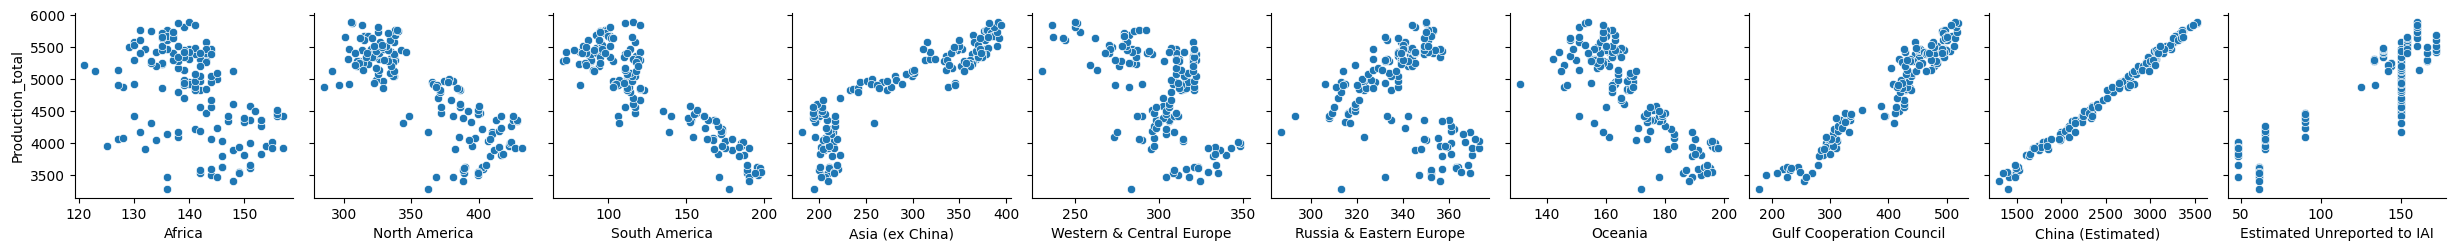

In [17]:
sns.pairplot(data=alu_production, y_vars=["Production_total"], x_vars=alu_production.columns[1:-1])